## Lecture 3 Coding Exercise: Introduction to Univariate Forecasting Methods

### Objectives:

- Learn how to apply forecasting methods including Exponential Smoothing and ARIMA.
- Understand the strengths and limitations of each  model
- Hands-on experience in model selection, parameter tuning, and forecasting evaluation.


In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt


In [ ]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

### 1. Loading and Preparing Data

#### **Load and prepare the time series dataset**.

   - Load a real-life time series dataset with trend and seasonality 
   - Handle any missing values and set the appropriate frequency for the dataset
   - You can try using a different real-world dataset(The **Monthly Electricity Production** dataset is provided as an example solution)

In [26]:
## Write Code Here ##

### 2. Implementing Exponential Smoothing

#### 2.1 Applying Simple Exponential Smoothing and Compare to Moving Average 
- Apply **Simple Exponential Smoothing** and compare the smoothing capability with a regular **Moving Average**.
- Experiment with different window sizes for the moving average and different smoothing levels for Simple Exponential Smoothing to observe their impact on smoothing effectiveness.

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [27]:
## Write Code Here ##

In [28]:
## Write Code Here ##

#### 2.2 Using Exponential Smoothing for Forecasting

- Split the data into train and test sets
- Use **Double** and **Triple Exponential Smoothing** to implement forecasting
- Experiment with different smoothing levels or seasonal periods to observe their impact on forecast accuracy


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

In [29]:
### Write Code Here ##

### 3. Autoregressive (AR) and Moving Average (MA) Modeling

#### **Explore ARIMA Modeling**.

   - Use **ACF and PACF** plots to determine appropriate parameters for ARIMA modeling.
   - Fit an **ARIMA** model and forecast the future values.

#### Deciding Between Transformations for ARIMA

  - **Log Transformation**: Choose log transformation if the data has exponential growth or high variance that needs to be stabilized
  - **Differencing**: First-order differencing removes linear trends, while Second-order differencing helps remove increasing non-linear trends
  - **Seasonal Differencing**: Seasonal differencing should be applied when the data exhibits strong seasonality. It helps ARIMA better capture the underlying seasonal patterns 
  - Start by visualizing the data and checking for exponential growth, variance changes, or seasonality

In [31]:
## Write Code Here ##

####  Use **ACF and PACF** plots to determine parameters for ARIMA modeling
  

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [30]:
## Write Code Here ##

### Autoregressive Integrated Moving Average (ARIMA) Modeling

   - Fit an **ARIMA** model on the selected data set and forecast the future values to compare their forecasting performance
   - Adjust the model's hyper-parameters (p, d, q) manually or using a function. Observe the effect on the forecasting effectiveness

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

#### Train Test Split

In [32]:
## Write Code Here ##

#### Fit Models

In [33]:
## Write Code Here ##

#### Print Results 

In [34]:
## Write Code Here ##


#### Auto-ARIMA
- Use **Auto-ARIMA** from `pmdarima` to automatically determine the best order of p, d, q, and compare its performance to the manually determined ARIMA model
- Use Original vs Transformed data version and compare the results

In [ ]:
import pmdarima as pm

##### Differenced data

In [35]:
## Write Code Here ##

##### Original data

In [36]:
## Write Code Here ##

## Lecture 3 Coding Exercise: Solution Example

### Objectives:

- Learn how to apply forecasting methods including Exponential Smoothing and ARIMA.
- Understand the strengths and limitations of each  model
- Hands-on experience in model selection, parameter tuning, and forecasting evaluation.


In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt


In [2]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

### 1. Loading and Preparing Data

#### **Load and prepare the time series dataset**.

   - Load a real-life time series dataset with trend and seasonality 
   - Handle any missing values and set the appropriate frequency for the dataset
   - You can try using a different real-world dataset(The **Monthly Electricity Production** dataset is provided as an example solution)

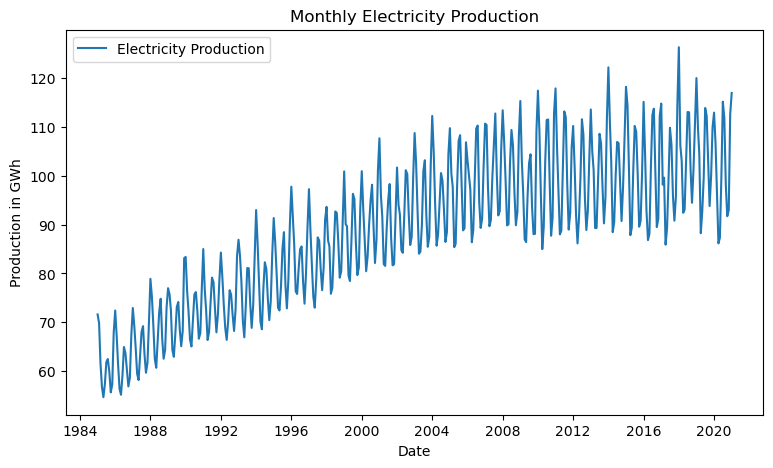

In [3]:
# Load Electricity Production dataset from FRED (Federal Reserve Economic Data)
start = datetime.datetime(1985, 1, 1)
end = datetime.datetime(2021, 1, 1)
electricity_df = web.DataReader('IPG2211A2N', 'fred', start, end)

# Rename column for better readability
electricity_df.rename(columns={'IPG2211A2N': 'E_Production'}, inplace=True)

# Handle any missing values
electricity_df.ffill(inplace=True)

# Set frequency to monthly
electricity_df.index.freq = 'MS'

# Plot the data
plt.figure(figsize=(9, 5))
plt.plot(electricity_df, label='Electricity Production')
plt.title('Monthly Electricity Production')
plt.xlabel('Date')
plt.ylabel('Production in GWh')
plt.legend()
plt.show()

### 2. Implementing Exponential Smoothing

#### 2.1 Applying Simple Exponential Smoothing and Compare to Moving Average 
- Apply **Simple Exponential Smoothing** and compare the smoothing capability with a regular **Moving Average**.
- Experiment with different window sizes for the moving average and different smoothing levels for Simple Exponential Smoothing to observe their impact on smoothing effectiveness.

In [4]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

/opt/anaconda3/envs/TimeSeriesCourse/lib/python3.12/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


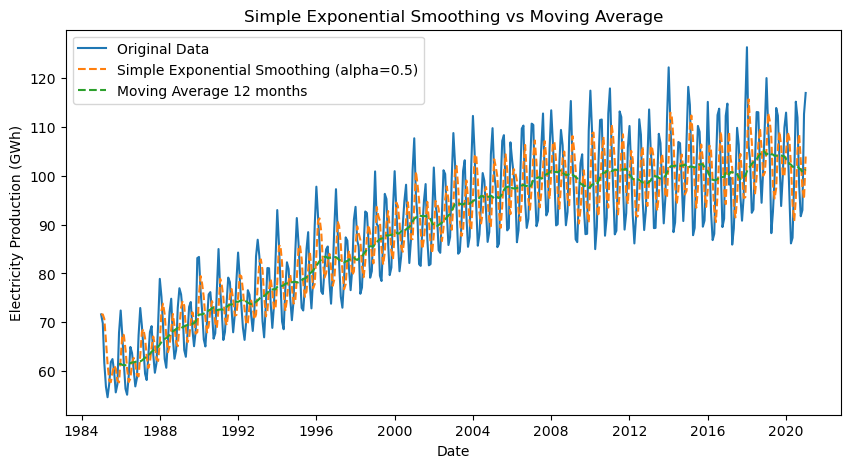

In [5]:
alpha = 0.5 # Smoothing parameter
months_window = 12 # Window for moving average

# Simple Exponential Smoothing
model_single = SimpleExpSmoothing(electricity_df).fit(smoothing_level=alpha)
smoothed_single = model_single.fittedvalues

# Moving Average (window=12 months)
moving_avg = electricity_df.rolling(window=months_window).mean().dropna()

# Plot the smoothed values and moving average
plt.figure(figsize=(10, 5))
plt.plot(electricity_df.index, electricity_df, label='Original Data')
plt.plot(smoothed_single.index, smoothed_single, label=f'Simple Exponential Smoothing (alpha={alpha})' , linestyle='--')
plt.plot(moving_avg.index, moving_avg, label= f'Moving Average {months_window} months', linestyle='--')
plt.title('Simple Exponential Smoothing vs Moving Average')
plt.xlabel('Date')
plt.ylabel('Electricity Production (GWh)')
plt.legend()
plt.show()

/opt/anaconda3/envs/TimeSeriesCourse/lib/python3.12/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


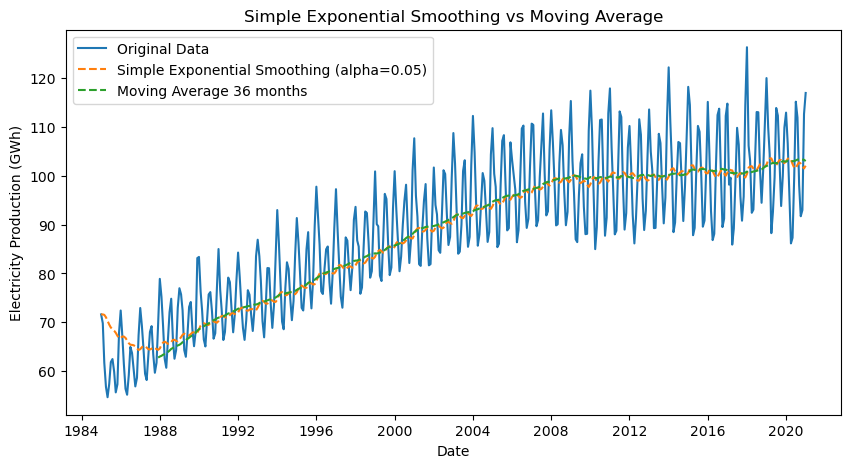

In [6]:
alpha = 0.05 # Smoothing parameter
months_window = 36 # Window for moving average

# Simple Exponential Smoothing
model_single = SimpleExpSmoothing(electricity_df).fit(smoothing_level=alpha)
smoothed_single = model_single.fittedvalues

# Moving Average (window=12 months)
moving_avg = electricity_df.rolling(window=months_window).mean().dropna()

# Plot the smoothed values and moving average
plt.figure(figsize=(10, 5))
plt.plot(electricity_df.index, electricity_df, label='Original Data')
plt.plot(smoothed_single.index, smoothed_single, label=f'Simple Exponential Smoothing (alpha={alpha})' , linestyle='--')
plt.plot(moving_avg.index, moving_avg, label= f'Moving Average {months_window} months', linestyle='--')
plt.title('Simple Exponential Smoothing vs Moving Average')
plt.xlabel('Date')
plt.ylabel('Electricity Production (GWh)')
plt.legend()
plt.show()

#### 2.2 Using Exponential Smoothing for Forecasting

- Use **Double** and **Triple Exponential Smoothing** to implement forecasting
- Experiment with different smoothing levels or seasonal periods for Triple Exponential Smoothing to observe their impact on forecast accuracy


In [7]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

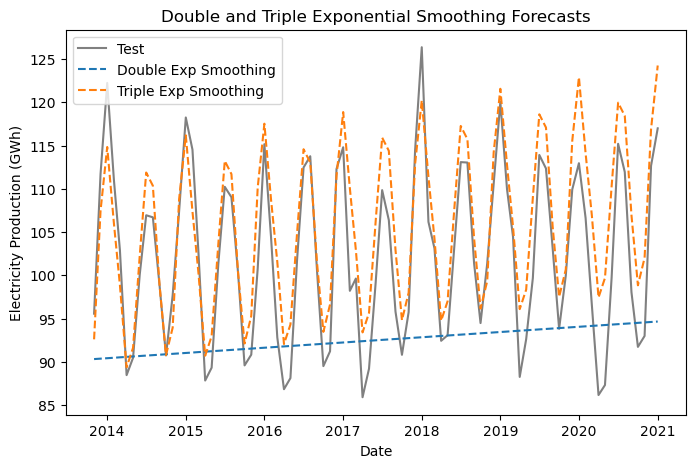

RMSE Double: 13.82
RMSE Triple: 5.43


In [8]:
# Split data into training and test sets
# set train proportion
train_proportion = 0.8
#set length of train
train_length = int(len(electricity_df) * train_proportion)
#split data
train, test = electricity_df.iloc[:train_length], electricity_df.iloc[train_length:]

# Double Exponential Smoothing
model_double = ExponentialSmoothing(train, trend='add').fit()
forecast_double = model_double.forecast(len(test))

# Triple Exponential Smoothing (Holt-Winters)
model_triple = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12).fit()
forecast_triple = model_triple.forecast(len(test))

# Plot the forecasts
plt.figure(figsize=(8, 5))
#plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='gray')
plt.plot(test.index, forecast_double, label='Double Exp Smoothing', linestyle='--')
plt.plot(test.index, forecast_triple, label='Triple Exp Smoothing', linestyle='--')
plt.title('Double and Triple Exponential Smoothing Forecasts')
plt.xlabel('Date')
plt.ylabel('Electricity Production (GWh)')
plt.legend()
plt.show()

# Calculate and print RMSE values
rmse_double = np.sqrt(mean_squared_error(test, forecast_double))
rmse_triple = np.sqrt(mean_squared_error(test, forecast_triple))

print(f'RMSE Double: {rmse_double:.2f}')
print(f'RMSE Triple: {rmse_triple:.2f}')

### 3. Autoregressive (AR) and Moving Average (MA) Modeling

#### **Explore ARIMA Modeling**.

   - Use **ACF and PACF** plots to determine appropriate parameters for ARIMA modeling.
   - Fit an **ARIMA** model and forecast the future values.

#### Deciding Between Transformations for ARIMA

  - **Log Transformation**: Choose log transformation if the data has exponential growth or high variance that needs to be stabilized. It can help ARIMA handle varying variance better.
  - **Differencing**: First-order differencing removes linear trends, while Second-order differencing helps remove increasing non-linear trends.
  - **Seasonal Differencing**: Seasonal differencing should be applied when the data exhibits strong seasonality. It helps ARIMA better capture the underlying seasonal patterns and reduce overfitting.
  - **Summary**: Start by visualizing the data and checking for exponential growth, variance changes, or seasonality. Use ADF and KPSS tests to determine stationarity. If seasonality is detected, apply seasonal differencing.

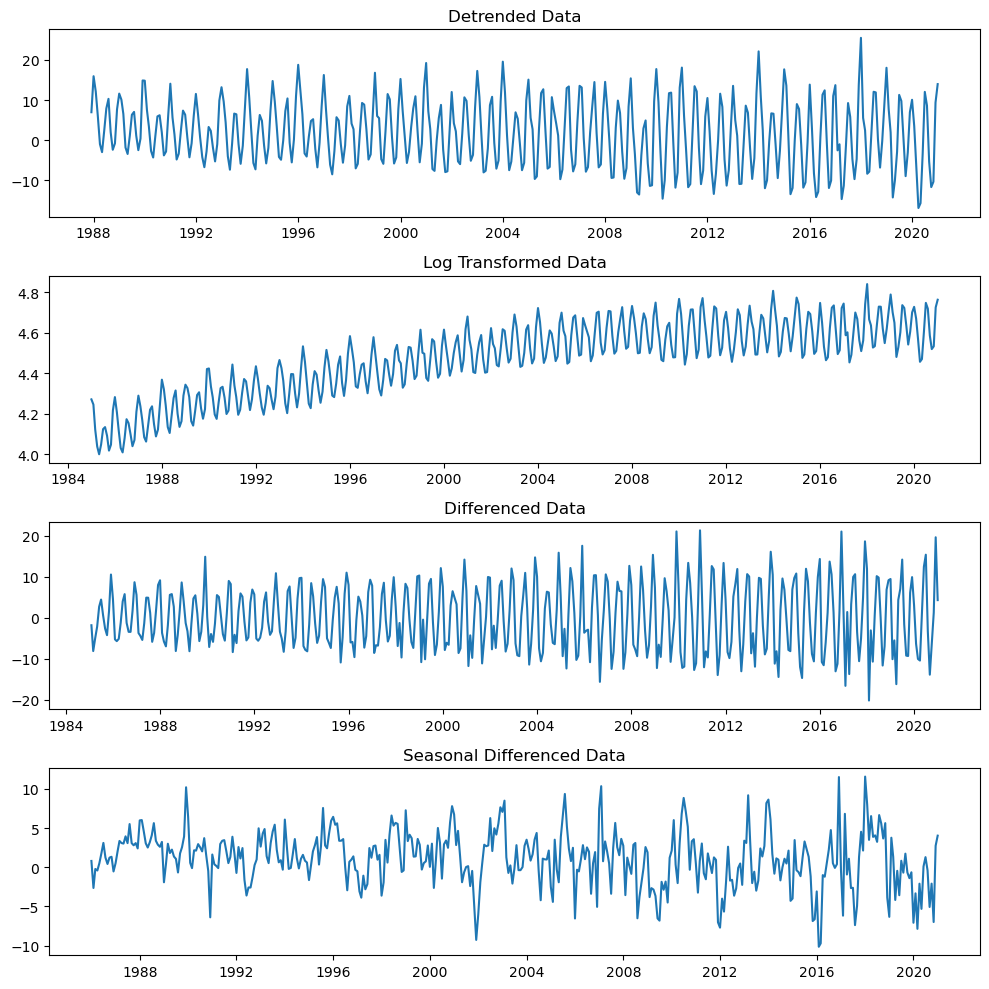

In [9]:
# De-trend the data
detrended = electricity_df - moving_avg
detrended.dropna(inplace=True)

# Log Transformation
log_transformed = np.log(electricity_df['E_Production'])

# Differencing
differenced = electricity_df['E_Production'].diff().dropna()

# Seasonal Differencing
seasonal_diff = electricity_df['E_Production'].diff(12).dropna()

# Plot the transformed data on subplots
fig, axes = plt.subplots(4, 1, figsize=(10, 10))
axes[0].plot(detrended, label='Detrended')
axes[0].set_title('Detrended Data')
axes[1].plot(log_transformed, label='Log Transformed')
axes[1].set_title('Log Transformed Data')
axes[2].plot(differenced, label='Differenced')
axes[2].set_title('Differenced Data')
axes[3].plot(seasonal_diff, label='Seasonal Differenced')
axes[3].set_title('Seasonal Differenced Data')
plt.tight_layout()
plt.show()

####  Use **ACF and PACF** plots to determine parameters for ARIMA modeling
  

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

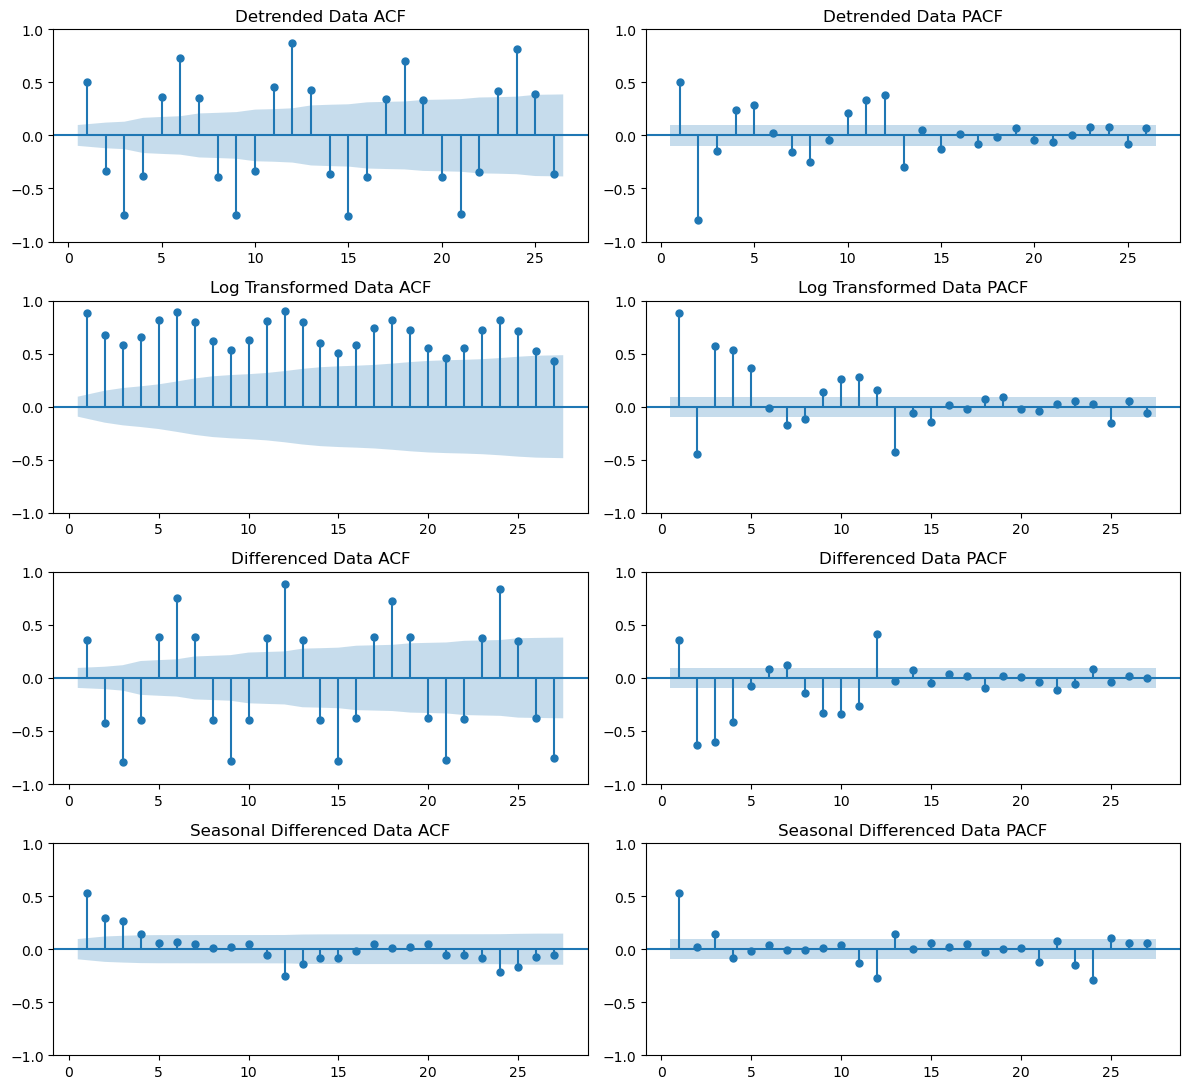

In [12]:
# plot acf and pacf of the transformed data 
fig, axes = plt.subplots(4, 2, figsize=(12, 11))
plot_acf(detrended, ax=axes[0, 0], title='Detrended Data ACF', zero=False)
plot_pacf(detrended, ax=axes[0, 1], title='Detrended Data PACF', zero=False)
plot_acf(log_transformed, ax=axes[1, 0], title='Log Transformed Data ACF', zero=False)
plot_pacf(log_transformed, ax=axes[1, 1], title='Log Transformed Data PACF', zero=False)
plot_acf(differenced, ax=axes[2, 0], title='Differenced Data ACF', zero=False)
plot_pacf(differenced, ax=axes[2, 1], title='Differenced Data PACF', zero=False)
plot_acf(seasonal_diff, ax=axes[3, 0], title='Seasonal Differenced Data ACF', zero=False)
plot_pacf(seasonal_diff, ax=axes[3, 1], title='Seasonal Differenced Data PACF', zero=False)
plt.tight_layout()
plt.show()

### Autoregressive Integrated Moving Average (ARIMA) Modeling

   - Fit an **ARIMA** model on the selected and forecast the future values to compare their forecasting performance
   - Adjust the model's hyper-parameters (p, d, q) manually or using a function. Observe the effect on the forecasting effectiveness

In [13]:
from statsmodels.tsa.arima.model import ARIMA

#### Train Test Split

In [14]:
# Split data into training and test sets
# set train proportion
train_proportion = 0.85
#set length of train
train_length = int(len(electricity_df) * train_proportion)
#split data
train_log, test_log = log_transformed.iloc[:train_length], log_transformed.iloc[train_length:]
train_diff, test_diff = differenced.iloc[:train_length], differenced.iloc[train_length:]
train_seasonal_diff, test_seasonal_diff = seasonal_diff.iloc[:train_length], seasonal_diff.iloc[train_length:]

#print shapes
print('train_log shape:', train_log.shape, 'test_log shape:', test_log.shape)
print('train_diff shape:', train_diff.shape, 'test_diff shape:', test_diff.shape)
print('train_seasonal_diff shape:', train_seasonal_diff.shape, 'test_seasonal_diff shape:', test_seasonal_diff.shape)


train_log shape: (368,) test_log shape: (65,)
train_diff shape: (368,) test_diff shape: (64,)
train_seasonal_diff shape: (368,) test_seasonal_diff shape: (53,)


#### Fit Models

In [16]:
# Fit ARIMA model on log_transformed data based on visual inspection of ACF and PACF 
model_arima_log = ARIMA(train_log, order=(4, 1, 2)).fit()
#    
# Fit ARIMA model on differenced data based on visual inspection of ACF and PACF
model_arima_diff = ARIMA(train_diff, order=(2, 0, 4)).fit()
forecast_arima_diff = model_arima_diff.forecast(steps=len(test_diff))

# Fit ARIMA model on seasonally differenced data based on visual inspection of ACF and PACF
model_arima_seasonal_diff = ARIMA(train_seasonal_diff, order=(5, 0, 5)).fit()
forecast_arima_seasonal_diff = model_arima_seasonal_diff.forecast(steps=len(test_seasonal_diff))

/opt/anaconda3/envs/TimeSeriesCourse/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/TimeSeriesCourse/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/TimeSeriesCourse/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### Print Results 

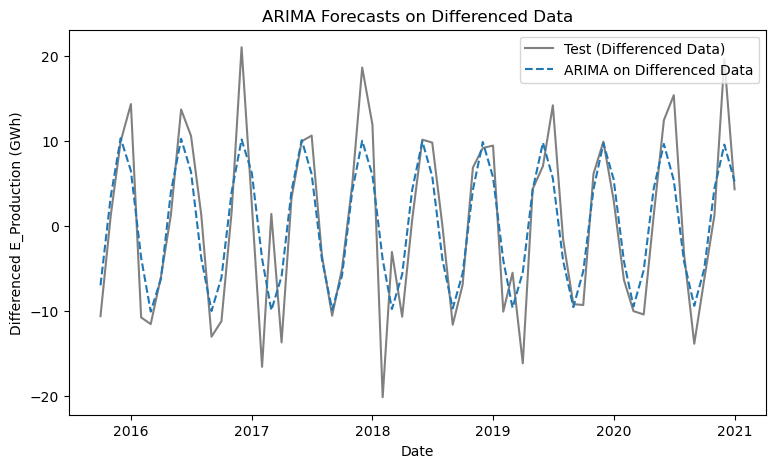

RMSE ARIMA on Out-Of-Sample Differenced Data: 5.34


In [20]:
# Plot the ARIMA forecasts for the differenced data
plt.figure(figsize=(9, 5))
plt.plot(test_diff.index, test_diff, label='Test (Differenced Data)', color='gray')
plt.plot(test_diff.index, forecast_arima_diff, label='ARIMA on Differenced Data', linestyle='--')
plt.title('ARIMA Forecasts on Differenced Data')
plt.xlabel('Date')
plt.ylabel('Differenced E_Production (GWh)')
plt.legend()
plt.show()

# Calculate and print RMSE values 
rmse_diff = np.sqrt(mean_squared_error(test_diff, forecast_arima_diff))
print(f'RMSE ARIMA on Out-Of-Sample Differenced Data: {rmse_diff:.2f}')


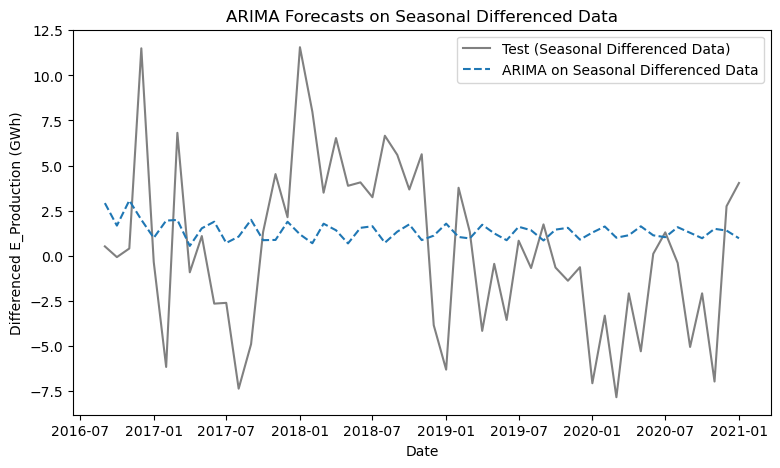

RMSE ARIMA on Out-Of-Sample Seasonal Differenced Data: 4.75


In [18]:
# Plot the ARIMA forecasts for the seasonally differenced data
plt.figure(figsize=(9, 5))
plt.plot(test_seasonal_diff.index, test_seasonal_diff, label='Test (Seasonal Differenced Data)', color='gray')
plt.plot(test_seasonal_diff.index, forecast_arima_seasonal_diff, label='ARIMA on Seasonal Differenced Data', linestyle='--')
plt.title('ARIMA Forecasts on Seasonal Differenced Data')
plt.xlabel('Date')
plt.ylabel('Differenced E_Production (GWh)')
plt.legend()
plt.show()

# Calculate and print RMSE values
rmse_seasonal_diff = np.sqrt(mean_squared_error(test_seasonal_diff, forecast_arima_seasonal_diff))
print(f'RMSE ARIMA on Out-Of-Sample Seasonal Differenced Data: {rmse_seasonal_diff:.2f}')

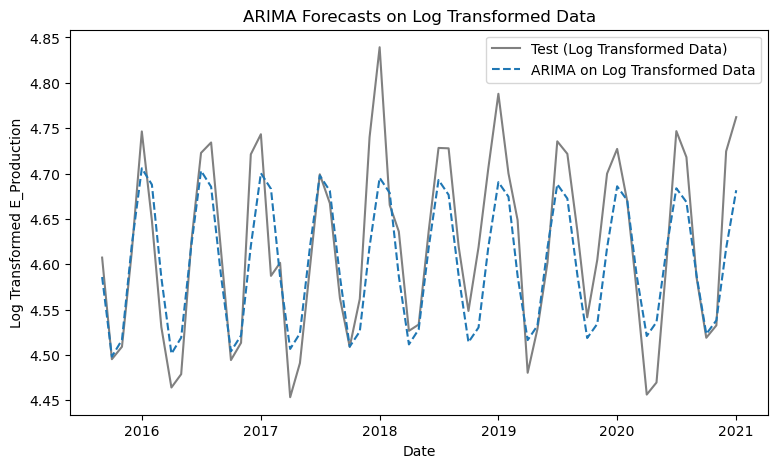

RMSE ARIMA on Out-Of-Sample Log Transformed Data: 0.05


In [19]:
# Plot the ARIMA forecasts for the log transformed data
forecast_arima_log = model_arima_log.forecast(steps=len(test_log))
plt.figure(figsize=(9, 5))
plt.plot(test_log.index, test_log, label='Test (Log Transformed Data)', color='gray')
plt.plot(test_log.index, forecast_arima_log, label='ARIMA on Log Transformed Data', linestyle='--')
plt.title('ARIMA Forecasts on Log Transformed Data')
plt.xlabel('Date')
plt.ylabel('Log Transformed E_Production')
plt.legend()
plt.show()

# Calculate and print RMSE values
rmse_log = np.sqrt(mean_squared_error(test_log, forecast_arima_log))
print(f'RMSE ARIMA on Out-Of-Sample Log Transformed Data: {rmse_log:.2f}')

#### Auto-ARIMA
- Use **Auto-ARIMA** from `pmdarima` to automatically determine the best order of p, d, q, and compare its performance to the manually determined ARIMA model

In [21]:
import pmdarima as pm

##### Differenced data

In [22]:
# Use Auto-ARIMA to determine the best parameters for the ARIMA model
auto_model = pm.auto_arima(train_diff, seasonal=False, trace=True, start_p=1, start_q=1, max_p=10, max_q=10)

# Fit the auto-ARIMA model on the training data
auto_model_fit = ARIMA(train_diff, order=auto_model.order).fit()


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2404.151, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2525.340, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2469.654, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2403.441, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2325.252, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2292.088, Time=0.05 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1914.037, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2045.239, Time=0.03 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1914.173, Time=0.10 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=1909.069, Time=0.10 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=2248.019, Time=0.03 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=1916.761, Time=0.16 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=1885.062, Time=0.15 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=2229.575, Time=0.04 sec
 ARIMA(3,0,4)(0,0,0)[0]          

/opt/anaconda3/envs/TimeSeriesCourse/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


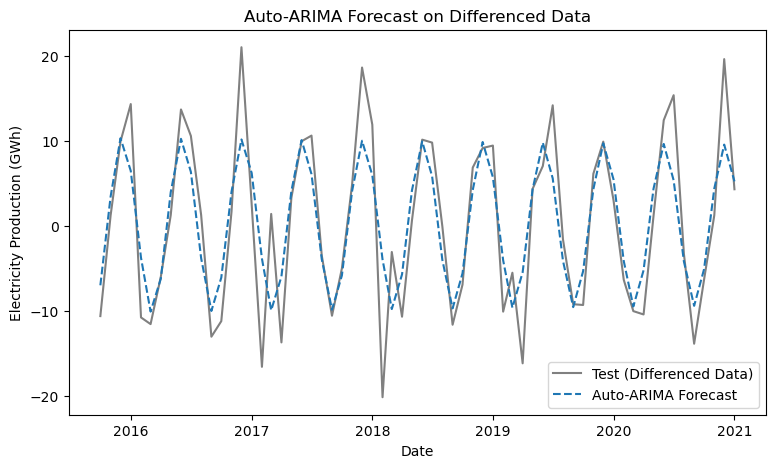

RMSE Auto-ARIMA on Differenced Data: 5.34


In [23]:
# Forecast using the auto-ARIMA model
forecast_auto_arima = auto_model_fit.forecast(steps=len(test_diff))

# Plot the Auto-ARIMA forecast
plt.figure(figsize=(9, 5))
plt.plot(test_diff.index, test_diff, label='Test (Differenced Data)', color='gray')
plt.plot(test_diff.index, forecast_auto_arima, label='Auto-ARIMA Forecast', linestyle='--')
plt.title('Auto-ARIMA Forecast on Differenced Data')
plt.xlabel('Date')
plt.ylabel('Electricity Production (GWh)')
plt.legend()
plt.show()

# Calculate and print RMSE for Auto-ARIMA model
rmse_auto_arima = np.sqrt(mean_squared_error(test_diff, forecast_auto_arima))
print(f'RMSE Auto-ARIMA on Differenced Data: {rmse_auto_arima:.2f}')

##### Original data

In [24]:
# Forecast using the auto-ARIMA model
model_auto_arima = pm.auto_arima(train, seasonal=True, trace=True, max_p=6, max_q=6, m=12)
forecast_auto_arima = model_auto_arima.predict(len(test))

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2356.234, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2049.046, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2354.253, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2242.605, Time=0.03 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1622.406, Time=0.36 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1726.203, Time=0.14 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=1623.239, Time=1.32 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=1655.112, Time=1.69 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1971.436, Time=0.54 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=1682.668, Time=0.69 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=1624.822, Time=2.06 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1644.308, Time=0.33 sec
 ARIMA(1,1,1)(1,0,1)[12] inte

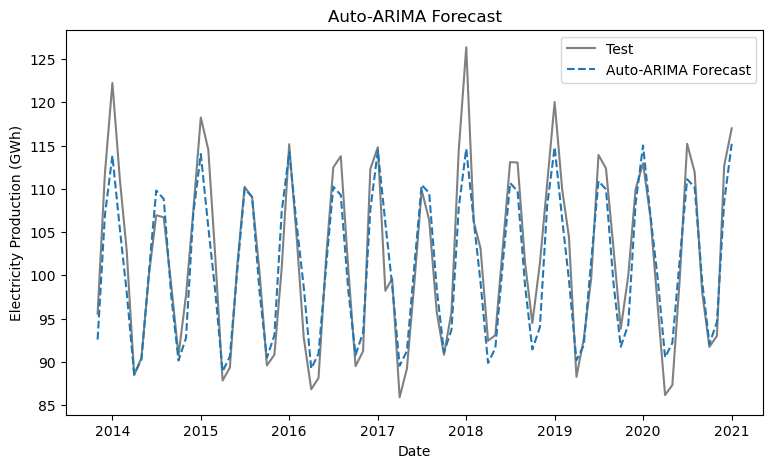

RMSE Auto-ARIMA: 3.62


In [25]:
# Plot the Auto-ARIMA forecast
plt.figure(figsize=(9, 5))
plt.plot(test.index, test, label='Test', color='gray')
plt.plot(test.index, forecast_auto_arima, label='Auto-ARIMA Forecast', linestyle='--')
plt.title('Auto-ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Electricity Production (GWh)')
plt.legend()
plt.show()

# Calculate and print RMSE for Auto-ARIMA model
rmse_auto_arima = np.sqrt(mean_squared_error(test, forecast_auto_arima))
print(f'RMSE Auto-ARIMA: {rmse_auto_arima:.2f}')